<a href="https://colab.research.google.com/github/EvaLiho/WoTech/blob/main/24_08_24_Linear_Regression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 17_08_2024

### Understanding the data

In [1]:
import pandas as pd

In [2]:
advertising = pd.read_csv('/content/tvmarketing.csv')

# TV - advertising budget spent on TV marketing
# Sales - how much we have sold (revenue, income)

In [3]:
advertising.head() #first 5 rows

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [4]:
advertising.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


### Regression plot

In [5]:
import seaborn as sns

<Axes: xlabel='TV', ylabel='Sales'>

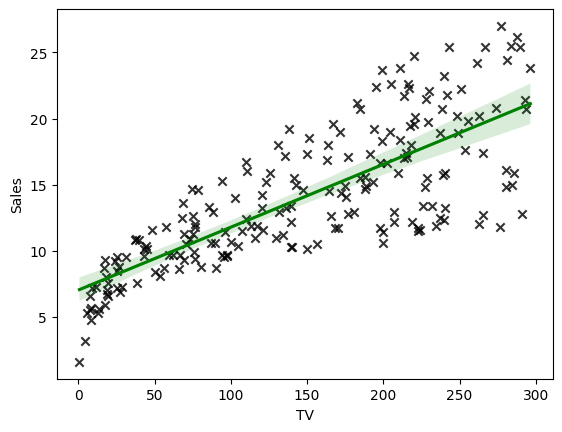

In [6]:
sns.regplot(
    data=advertising,
    x='TV',
    y="Sales",
    ci=99,
    marker="x",
    color="black",
    line_kws=dict(color="green"))

###Pearson correlation

In [7]:
# Pearson correlation coefficient (#positive, strong)
advertising.corr() #calculate corr for whole dataframe

,TV,Sales
TV,1.000000,0.782224
Sales,0.782224,1.000000


In [8]:
advertising['TV'].corr(advertising['Sales']) #same but with only one value

0.7822244248616061

### Supervised VS Unsupervised Learning

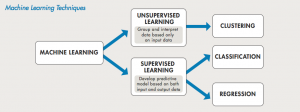
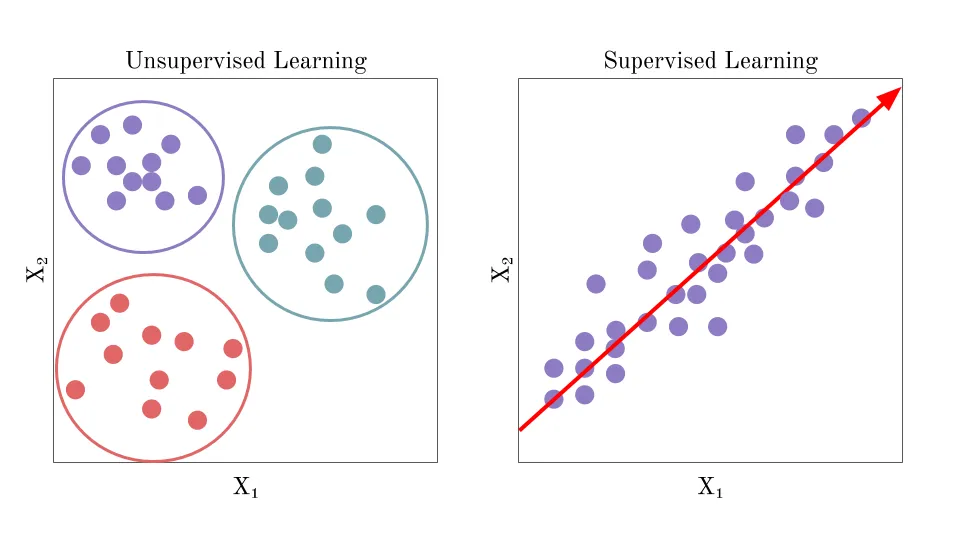

### Training linear regression model

scikit-learn library

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

### Data Preparation

In [9]:
# Preparing X
X = advertising.drop('Sales', axis=1) #independent variable
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [10]:
# Preparing Y
Y = advertising.drop('TV', axis=1) #the outcome, dependent
Y.head()

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


### Train/Test sets

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7)

In [13]:
X_train

,TV
98,289.7
57,136.2
97,184.9
192,17.2
118,125.7
...,...
29,70.6
162,188.4
94,107.4
102,280.2


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7, random_state=42)

train_size = 0.7 - 70% of the data goes into testing, 30% will be used for testing the data

random_state=42 - to get the same values every time (not needed)

In [15]:
X_train

,TV
169,284.3
97,184.9
31,112.9
12,23.8
35,290.7
...,...
106,25.0
14,204.1
92,217.7
179,165.6


COLUMN in a dataframe is called a FEATURE

ROW is called an OBSERVATION

### Train the Model

In [16]:
from sklearn.linear_model import LinearRegression #Import the model

In [17]:
model = LinearRegression() #Initialize the model

In [18]:
model.fit(X_train, y_train) #Fit the model

LinearRegression()

In [19]:
# Y = mX + b - linear regression function
# slaes (Y), slope (m), intercept(b) (where linear line intercepts X line, X=0)

print(f'Model intercept is: {model.intercept_}')
print(f'Model coefficient is: {model.coef_}')

Model intercept is: [7.23945983]
Model coefficient is: [[0.0464078]]


### A Prediction

In [20]:
my_new_budget = [[50]] # same format as the model, [[]] - 2D array dataset

my_predicted_sales = model.predict(my_new_budget)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [21]:
print(f'When the new budget is {my_new_budget[0][0]}, then predicted sales are {round(my_predicted_sales[0][0])}.')

When the new budget is 50, then predicted sales are 10.


In [22]:
X_test.head()

,TV
95,163.3
15,195.4
30,292.9
158,11.7
128,220.3


In [23]:
y_pred = model.predict(X_test)

In [24]:
final_df = pd.DataFrame()
final_df['TV'] = X_test
final_df['Actual_sales'] = y_test
final_df['Predicted_sales'] = y_pred

In [25]:
final_df.head()

,TV,Actual_sales,Predicted_sales
95,163.3,16.9,14.817854
15,195.4,22.4,16.307544
30,292.9,21.4,20.832305
158,11.7,7.3,7.782431
128,220.3,24.7,17.463099


In [26]:
final_df['ABS_Error_Actual_vs_Predicted'] = abs(final_df['Actual_sales']-final_df['Predicted_sales'])

In [27]:
final_df.head()

,TV,Actual_sales,Predicted_sales,ABS_Error_Actual_vs_Predicted
95,163.3,16.9,14.817854,2.082146
15,195.4,22.4,16.307544,6.092456
30,292.9,21.4,20.832305,0.567695
158,11.7,7.3,7.782431,0.482431
128,220.3,24.7,17.463099,7.236901


# 24_08_2024

### Visualize the Results ('ABS_Error_Actual_vs_Predicted')

In [31]:
# reset index to correct order (before was random)
final_df.reset_index(inplace=True)

In [28]:
import matplotlib.pyplot as plt

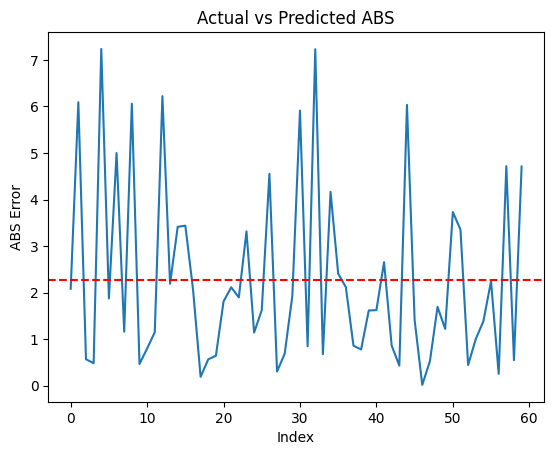

In [36]:
plt.plot(final_df.index, final_df.ABS_Error_Actual_vs_Predicted)
plt.title('Actual vs Predicted ABS')
plt.xlabel('Index')
plt.ylabel('ABS Error')

#average line
plt.axhline(final_df['ABS_Error_Actual_vs_Predicted'].mean(), linestyle='dashed', color='red')

### Evaluating a Model

Mean Absolute Error method

In [40]:
from sklearn.metrics import mean_absolute_error

In [38]:
mae = mean_absolute_error(y_test, y_pred)

In [39]:
print(f'Mean Absolute Error is: {mae}')

Mean Absolute Error is: 2.2758809050205113


R2 and MSE (Mean Squared Error) method

In [45]:
from sklearn.metrics import r2_score, mean_squared_error

In [46]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [47]:
print(f'MSE is: {mse}')
print(f'R2 is: {r2}')

MSE is: 8.970991242413614
R2 is: 0.6714477229302764
